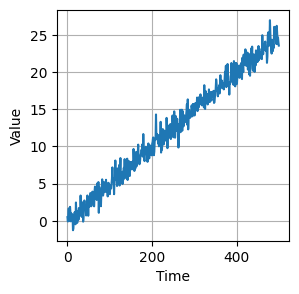

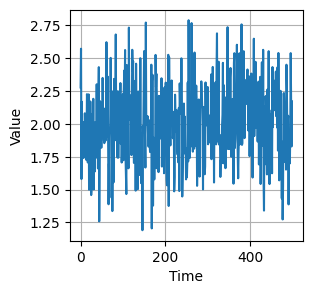

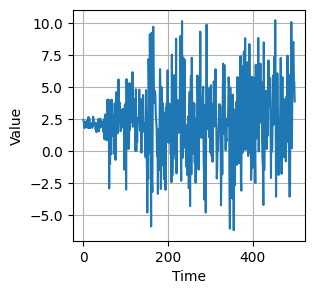

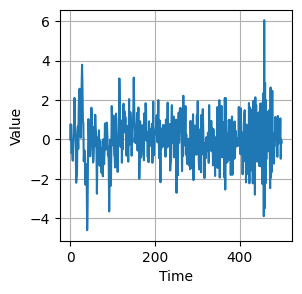

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf

# Настройка параметров для воспроизводимости результатов
np.random.seed(42)
n = 500  # Длина временного ряда

# Генерация временного ряда с линейным трендом
t = np.arange(n)
trend = 0.05 * t  # Линейный тренд
noise = np.random.normal(0, 1, n)  # Случайная компонента (белый шум)

# Нестационарный ряд: мат. ожидание растет со временем, дисперсия и ковариация шума постоянны
non_stationary_series = trend + noise

# Стационарный ряд с ненулевым средним
constant_mean_series = 2 + np.random.normal(0, 0.3, n)  # Мат. ожидание = 2

# Дисперсия меняется скачками
variance_steps = np.ones(n)
variance_steps[:50] = 0.1    # Низкая дисперсия
variance_steps[50:150] = 3.0 # Средняя дисперсия  
variance_steps[150:] = 10.0   # Высокая дисперсия

non_stationary_series_disp = np.random.normal(2, np.sqrt(variance_steps), n)

# Линейно меняющаяся автокорреляция
changing_cov_series = np.zeros(n)

for i in range(1, n):
    phi = 0.9 - (0.9 - (-0.9)) * i / n  # От 0.9 до -0.9
    changing_cov_series[i] = phi * changing_cov_series[i-1] + np.random.normal(0, 1)

## Вычисляем автокорреляцию для разных частей ряда
#acf_first = acf(changing_cov_series[:50], nlags=1)[1]  # ACF для первых 50 точек
#acf_last = acf(changing_cov_series[-50:], nlags=1)[1]  # ACF для последних 50 точек

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))



# Визуализация
# Нестационарный по мат ожид
plt.figure(figsize=(3, 3))
plt.plot(non_stationary_series)
#plt.title('Смоделированный нестационарный временной ряд с линейным трендом')
plt.xlabel('Time')
plt.ylabel('Value')
plt.savefig(r'../images/nonStatOnE.png', bbox_inches='tight')
plt.grid(True)
plt.show()

# Визуализация
# Стационарный
plt.figure(figsize=(3, 3))
plt.plot(constant_mean_series)
#plt.title('Смоделированный нестационарный временной ряд с линейным трендом')
plt.xlabel('Time')
plt.ylabel('Value')
plt.savefig(r'../images/Stationary.png', bbox_inches='tight')
plt.grid(True)
plt.show()

# Визуализация
# НеСтационарный по дисп
plt.figure(figsize=(3, 3))
plt.plot(non_stationary_series_disp)
#plt.title('Смоделированный нестационарный временной ряд с линейным трендом')
plt.xlabel('Time')
plt.ylabel('Value')
plt.savefig(r'../images/nonStatOnVar.png', bbox_inches='tight')
plt.grid(True)
plt.show()

# Визуализация
# НеСтационарный по дисп
plt.figure(figsize=(3, 3))
plt.plot(changing_cov_series)
#plt.title('Смоделированный нестационарный временной ряд с линейным трендом')
plt.xlabel('Time')
plt.ylabel('Value')
plt.savefig(r'../images/nonStatOnCov.png', bbox_inches='tight')
plt.grid(True)
plt.show()



## Проверка стационарности с помощью теста Дики-Фуллера
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Ряд стационарен (отвергаем H0)")
    else:
        print("Ряд нестационарен (не отвергаем H0)")

#print("Результат теста Дики-Фуллера для сгенерированного ряда:")
#check_stationarity(non_stationary_series)

## Дополнительная проверка: вычисление скользящего среднего и дисперсии для наглядности
#window = 20
#rolling_mean = np.convolve(non_stationary_series, np.ones(window)/window, mode='valid')
#rolling_var = np.convolve(non_stationary_series**2, np.ones(window)/window, mode='valid') - rolling_mean**2

#plt.figure(figsize=(12, 8))
#plt.subplot(3, 1, 1)
#plt.plot(non_stationary_series)
#plt.title('Исходный ряд с трендом')
#plt.grid(True)

#plt.subplot(3, 1, 2)
#plt.plot(rolling_mean)
#plt.title('Скользящее среднее (демонстрирует рост мат. ожидания)')
#plt.grid(True)

#plt.subplot(3, 1, 3)
#plt.plot(rolling_var)
##plt.title('Скользящая дисперсия (остается примерно постоянной)')
#plt.grid(True)

#plt.tight_layout()
#plt.show()

In [13]:
check_stationarity(constant_mean_series)

ADF Statistic: -14.719231601116306
p-value: 2.768704650702751e-27
Ряд стационарен (отвергаем H0)


Конечно не супер наглядно график  с ковариациями выглядит. В инете есть более красивые 
(тут  (https://ivan-shamaev.ru/time-series-analysis-forecasting-and-models-python-libraries/#i-5)
(тут) (https://habr.com/ru/companies/ods/articles/327242/)
